In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import joblib
import matplotlib.pyplot as plt

In [8]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Load the dataset (Ensure it has 'text' and 'label' columns for classification)
df = pd.read_csv("D:\\Project\\ML\\paper\\Twitter_Data.csv")  # Update with your dataset path
print("Dataset loaded successfully!")
print(df.head())

# Ensure columns exist
text_column = 'clean_text'  # Column containing text data
label_column = 'category'  # Column containing labels

if text_column not in df.columns or label_column not in df.columns:
    raise ValueError(f"Dataset must contain columns '{text_column}' and '{label_column}'")


Dataset loaded successfully!
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [10]:
# Preprocess the text (if needed)
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string entries
        return ""
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove links
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [11]:
df['cleaned_text'] = df[text_column].apply(clean_text)
print("\nSample cleaned text:")
print(df[['clean_text', 'cleaned_text']].head())


Sample cleaned text:
                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                        cleaned_text  
0  modi promised minimum government maximum gover...  
1             talk nonsense continue drama vote modi  
2  say vote modi welcome bjp told rahul main camp...  
3  asking supporters prefix chowkidar names modi ...  
4  answer among powerful world leader today trump...  


In [12]:
# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df[label_column]

In [19]:
# Check for missing values in the target variable 'category'
print(f"Missing values in target variable: {df[label_column].isnull().sum()}")
# Remove rows with NaN values in 'category'
df_cleaned = df.dropna(subset=[label_column])
print(f"Shape of cleaned dataset: {df_cleaned.shape}")
# Extract features and labels again after removing NaN rows
X = tfidf.fit_transform(df_cleaned['cleaned_text']).toarray()
y = df_cleaned[label_column]

Missing values in target variable: 7
Shape of cleaned dataset: (162973, 3)


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.78      0.83      7230
         0.0       0.86      0.97      0.91     10961
         1.0       0.92      0.89      0.91     14404

    accuracy                           0.89     32595
   macro avg       0.89      0.88      0.88     32595
weighted avg       0.89      0.89      0.89     32595



In [24]:
# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8925


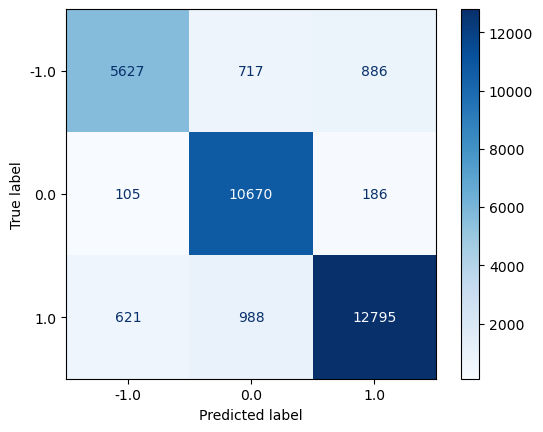

In [25]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
# Save the model and vectorizer for reuse
joblib.dump(model, 'text_classification_model.joblib')
joblib.dump(tfidf, 'text_classification_vectorizer.joblib')

['text_classification_vectorizer.joblib']

In [27]:
# Test the saved model with new text
new_texts = ["The movie was amazing and had great effects.", "This product is terrible, a waste of money."]  # Example texts
new_texts_cleaned = [clean_text(text) for text in new_texts]
new_texts_vectorized = tfidf.transform(new_texts_cleaned).toarray()
predicted_labels = model.predict(new_texts_vectorized)
print("\nPredicted Labels for new texts:")
print(predicted_labels)



Predicted Labels for new texts:
[ 1. -1.]
